**IMPORTING THE ZIP FILE AND EXTRACTING IT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from zipfile import ZipFile
data = "/content/drive/MyDrive/facemaskzip.zip"
try:
    with ZipFile(data, "r") as zip:
        zip.extractall()
        print("Data successfully extracted.")
except:
    print("There was an error.")

Data successfully extracted.


**IMPORTING DEPENDENCIES**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mat_img
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split as tts
import os

**IMPORTING DATA**

In [4]:
mask_on = os.listdir("/content/data/with_mask")
print(mask_on[:5])

['with_mask_1783.jpg', 'with_mask_984.jpg', 'with_mask_655.jpg', 'with_mask_2549.jpg', 'with_mask_472.jpg']


In [5]:
mask_off = os.listdir("/content/data/without_mask")
print(mask_off[:5])

['without_mask_2528.jpg', 'without_mask_35.jpg', 'without_mask_2611.jpg', 'without_mask_3412.jpg', 'without_mask_868.jpg']


👆 As seen above, the zip contained two files, each containing various mask-on and mask-off images.

**CHECKING HOW MANY WITH AND WITHOUT MASK IMAGES WE HAVE**

In [6]:
print("Number of masked images: ", len(mask_on))
print("Number of unmasked images: ", len(mask_off))

Number of masked images:  3725
Number of unmasked images:  3828


**ASSIGNING LABELS**

In [7]:
#1 SHALL REPRESENT MASKED AN 0 SHALL REPRESENT UNMASKED
mask_on_labels = [1]*len(mask_on)
mask_off_labels = [0]*len(mask_off)

labels = mask_on_labels + mask_off_labels

print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


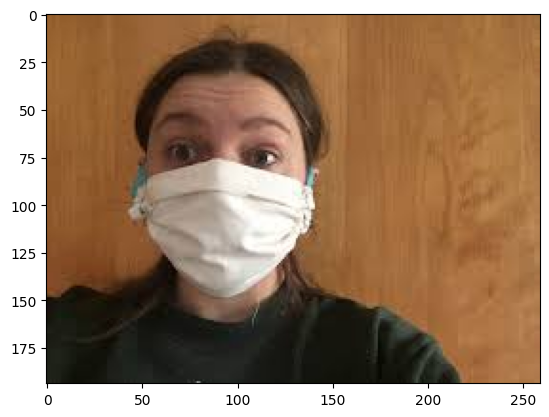

In [8]:
img = mat_img.imread("/content/data/with_mask/with_mask_2172.jpg")
imgplot = plt.imshow(img)
plt.show()

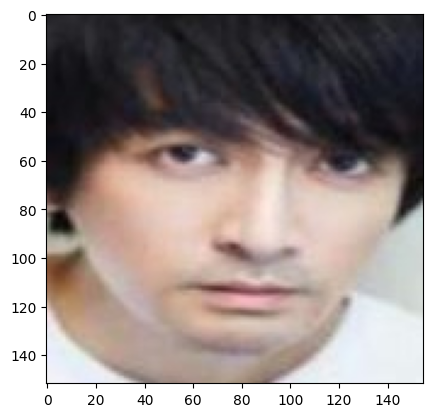

In [9]:
img = mat_img.imread("/content/data/without_mask/without_mask_3321.jpg")
imgplot = plt.imshow(img)
plt.show()

**RESIZING ALL IMAGES**

In [10]:
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in mask_on:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in mask_off:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
len(data)

7553

In [12]:
type(data) #as sen below each individual element s a numpy array

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[217, 179, 228],
        [211, 169, 219],
        [198, 150, 202],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[215, 177, 226],
        [194, 153, 203],
        [174, 126, 178],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[204, 166, 211],
        [181, 136, 184],
        [165, 112, 163],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
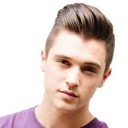

In [13]:
data[4678]

**CREATING X AND Y VARIABLES**

In [14]:
X = np.array(data)
Y = np.array(labels)
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (7553, 128, 128, 3)
Shape of Y:  (7553,)


In [15]:
#Split the data into training and testing sections
xtrain, xtest, ytrain, ytest = tts(X, Y, test_size= 0.2, random_state= 10) #20% of data sent to testing, 80% to training

In [16]:
print("Shape of xtrain: ",xtrain.shape)
print("Shape of ytrain: ",ytrain.shape)
print("Shape of xtest: ",xtest.shape)
print("Shape of ytest: ",ytest.shape)

Shape of xtrain:  (6042, 128, 128, 3)
Shape of ytrain:  (6042,)
Shape of xtest:  (1511, 128, 128, 3)
Shape of ytest:  (1511,)


**DATA SCALING**

In [17]:
xtrain_scaled = xtrain / 255
xtest_scaled = xtest / 255

print(xtrain_scaled[5])

[[[0.61176471 0.46666667 0.43137255]
  [0.61568627 0.47058824 0.43529412]
  [0.62352941 0.47843137 0.44313725]
  ...
  [0.45098039 0.40784314 0.42352941]
  [0.45882353 0.40392157 0.41568627]
  [0.45882353 0.4        0.41176471]]

 [[0.61568627 0.47058824 0.43529412]
  [0.63137255 0.48627451 0.45098039]
  [0.65490196 0.50980392 0.4745098 ]
  ...
  [0.45490196 0.41176471 0.42745098]
  [0.45490196 0.40392157 0.41960784]
  [0.45490196 0.40392157 0.41176471]]

 [[0.63529412 0.49019608 0.45490196]
  [0.65882353 0.51372549 0.47843137]
  [0.69803922 0.55294118 0.51764706]
  ...
  [0.45490196 0.41176471 0.42745098]
  [0.45882353 0.41176471 0.41960784]
  [0.45882353 0.41176471 0.41960784]]

 ...

 [[0.61568627 0.63529412 0.65490196]
  [0.61568627 0.63529412 0.65098039]
  [0.60784314 0.62745098 0.64705882]
  ...
  [0.27058824 0.33333333 0.39215686]
  [0.2745098  0.33333333 0.38823529]
  [0.27843137 0.33333333 0.38431373]]

 [[0.6745098  0.69411765 0.70980392]
  [0.65098039 0.67058824 0.68235294]


**CREATING A CONVOLUTED NEURAL NETWORK**

In [18]:
import tensorflow as tf
from tensorflow import keras

num_classes = 2
model = keras.Sequential()

In [19]:
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.LeakyReLU(alpha=0.1))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128))
model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.Dropout(0.40))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.Dropout(0.30))



model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# compile the neural network

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [34]:
#training model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor= "val_loss", patience = 5, restore_best_weights =True)

model1 = model.fit(xtrain_scaled, ytrain, validation_split= 0.10, epochs= 15, callbacks= early_stopping, batch_size=20)

Epoch 1/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - acc: 0.9538 - loss: 0.1215 - val_acc: 0.9207 - val_loss: 0.2361
Epoch 2/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.9603 - loss: 0.1143 - val_acc: 0.9140 - val_loss: 0.2440
Epoch 3/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - acc: 0.9591 - loss: 0.1177 - val_acc: 0.9207 - val_loss: 0.2257
Epoch 4/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9698 - loss: 0.0870 - val_acc: 0.9355 - val_loss: 0.2221
Epoch 5/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9755 - loss: 0.0745 - val_acc: 0.9207 - val_loss: 0.2953
Epoch 6/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - acc: 0.9739 - loss: 0.0768 - val_acc: 0.8893 - val_loss: 0.3911
Epoch 7/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - acc: 0.9750 - loss: 0.0703 - val_acc: 0.9306 - val_loss: 0.2474
Epoch 8/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9757 - loss: 0.0631 - val_acc: 0.9107 - val_loss: 0.2888
Epoch 9/15
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms

In [35]:
loss, accuracy = model.evaluate(xtest_scaled, ytest)
print(f"Accuracy of test: {accuracy:.3f}")
print(f"Loss during test: {loss:.3f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9379 - loss: 0.2252
Accuracy of test: 0.933
Loss during test: 0.221


**PLOTTING THE PERFORMANCE OF THE MODEL**

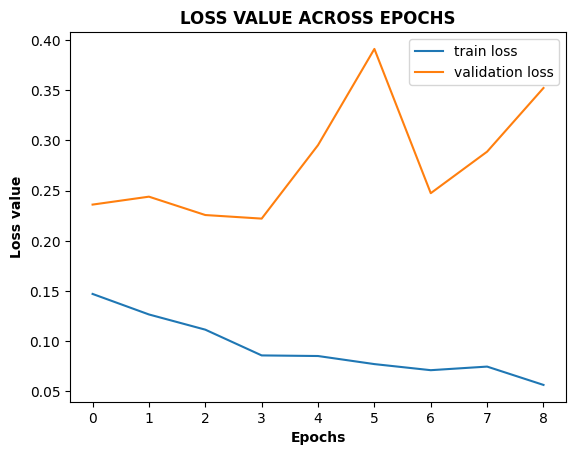

In [36]:
plt.title("LOSS VALUE ACROSS EPOCHS", weight="bold")
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='validation loss')
plt.xlabel("Epochs", weight="bold")
plt.ylabel("Loss value",weight="bold")
plt.legend()

plt.show()

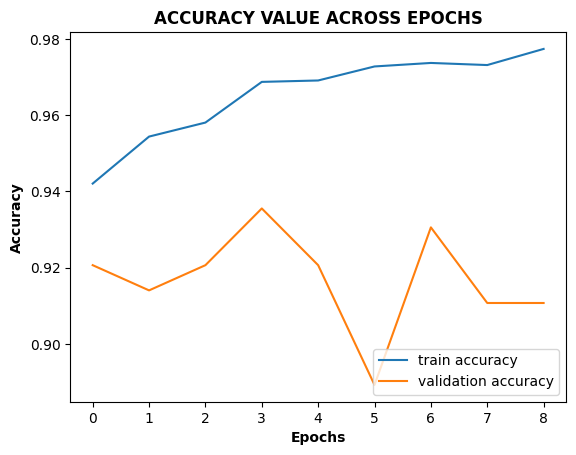

In [37]:
plt.title("ACCURACY VALUE ACROSS EPOCHS", weight="bold")
plt.plot(model1.history['acc'], label='train accuracy')
plt.plot(model1.history['val_acc'], label='validation accuracy')
plt.xlabel("Epochs",weight="bold")
plt.ylabel("Accuracy",weight="bold")
plt.legend(loc ="lower right")

plt.show()

**USING THE MODEL**

Path of the image: /content/drive/MyDrive/Colab Notebooks/man_without_mask.jpg


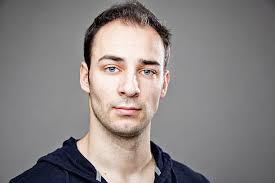

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[0.36843055 0.66682255]]
MASK DETECTED


In [38]:
from google.colab.patches import cv2_imshow

input_image_path = input('Path of the image: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

#print(input_pred_label)
if input_pred_label == 1:
    print('MASK DETECTED')

else:
    print('NO MASK DETCTED')

Path of the image: /content/data/with_mask/with_mask_2170.jpg


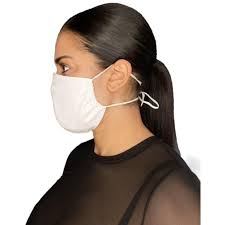

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.01038881 0.99685776]]
MASK DETECTED


In [39]:
input_image_path = input('Path of the image: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

#print(input_pred_label)
if input_pred_label == 1:
    print('MASK DETECTED')

else:
    print('NO MASK DETCTED')

In [40]:
input_image_path = input('Path of the image: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

#print(input_pred_label)
if input_pred_label == 1:
    print('MASK DETECTED')

else:
    print('NO MASK DETCTED')

Path of the image: /content/drive/MyDrive/Colab Notebooks/woman_without_mask.jpg


AttributeError: 'NoneType' object has no attribute 'clip'

In [41]:
from tensorflow.keras.backend import clear_session
clear_session()